# Exploratory Data Analysis (EDA) for Fashion Product Images

This notebook provides a comprehensive EDA for the fashion product image dataset. We will explore the metadata, analyze class distributions, and examine image characteristics.

We will use utility functions from `src/eda_utils.py` to keep our code clean and reusable.

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import seaborn as sns

# Import EDA utility functions
from src.eda_utils import (
    quote_product_display_name,
    merge_data,
    plot_class_distributions,
    plot_year_season_distribution,
    missing_values_summary
)

# Set plot style
sns.set(style='whitegrid')

## 1. Data Loading and Cleaning

We load the metadata from the CSV files. The `styles.csv` file may have product names with commas, so we use a cleaning function to ensure correct parsing.

In [2]:
# Clean up the dataset
quote_product_display_name('../fashion-dataset/styles.csv', '../fashion-dataset/styles_clean.csv')

# Define paths to the CSV files
images_csv = '../fashion-dataset/images.csv'
styles_csv = '../fashion-dataset/styles_clean.csv'

# Load datasets
styles_df = pd.read_csv(styles_csv)
images_df = pd.read_csv(images_csv)

print('Images CSV shape:', images_df.shape)
print('Styles CSV shape:', styles_df.shape)

Images CSV shape: (44446, 2)
Styles CSV shape: (44446, 10)


In [3]:
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [4]:
images_df.head()

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


We then merge the styles and images metadata into a single DataFrame for analysis.

In [5]:
df_merge = merge_data(styles_df, images_df)

print('Merged DataFrame shape:', df_merge.shape)

df_merge.head()

Merged DataFrame shape: (44446, 12)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


## 2. Missing Values Analysis

Before proceeding, it's important to check for missing values. This helps us understand data quality and decide if we need to clean or impute any fields.

In [6]:
# Get a summary of missing values per column
missing_summary = missing_values_summary(df_merge)
print(missing_summary)

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
filename                0
link                    0
dtype: int64


The following variables have missing values: `baseColour` (15), `season` (21), `year` (1), `usage` (317), and `productDisplayName` (7).

These are relatively few records compared to the total dataset size, so we choose to drop them for simplicity and to ensure clean visualizations.

In [7]:
# Drop rows with any missing values
df = df_merge.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44099 entries, 0 to 44445
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44099 non-null  int64  
 1   gender              44099 non-null  object 
 2   masterCategory      44099 non-null  object 
 3   subCategory         44099 non-null  object 
 4   articleType         44099 non-null  object 
 5   baseColour          44099 non-null  object 
 6   season              44099 non-null  object 
 7   year                44099 non-null  float64
 8   usage               44099 non-null  object 
 9   productDisplayName  44099 non-null  object 
 10  filename            44099 non-null  object 
 11  link                44099 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.4+ MB


## 3. Class Distribution Analysis

Let's analyze the distribution of key categorical variables: gender, masterCategory, subCategory, and baseColour.

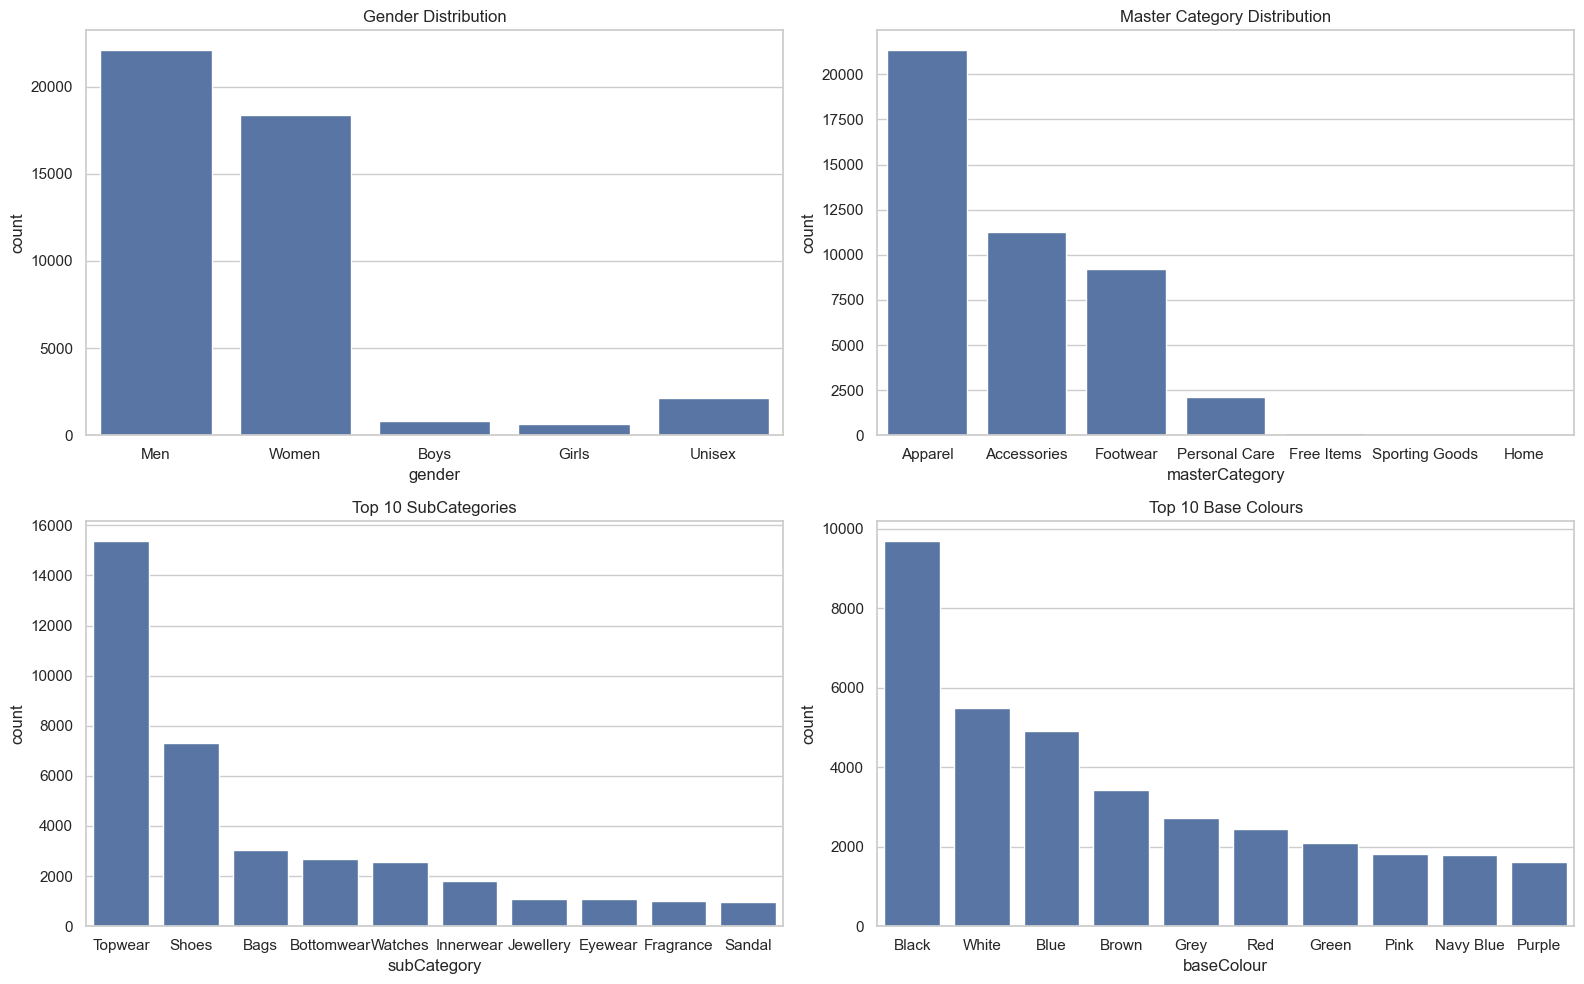

In [8]:
plot_class_distributions(df)

## 4. Year and Season Distribution

Now, let's see how products are distributed over years and seasons. This can reveal trends or seasonality in the data.

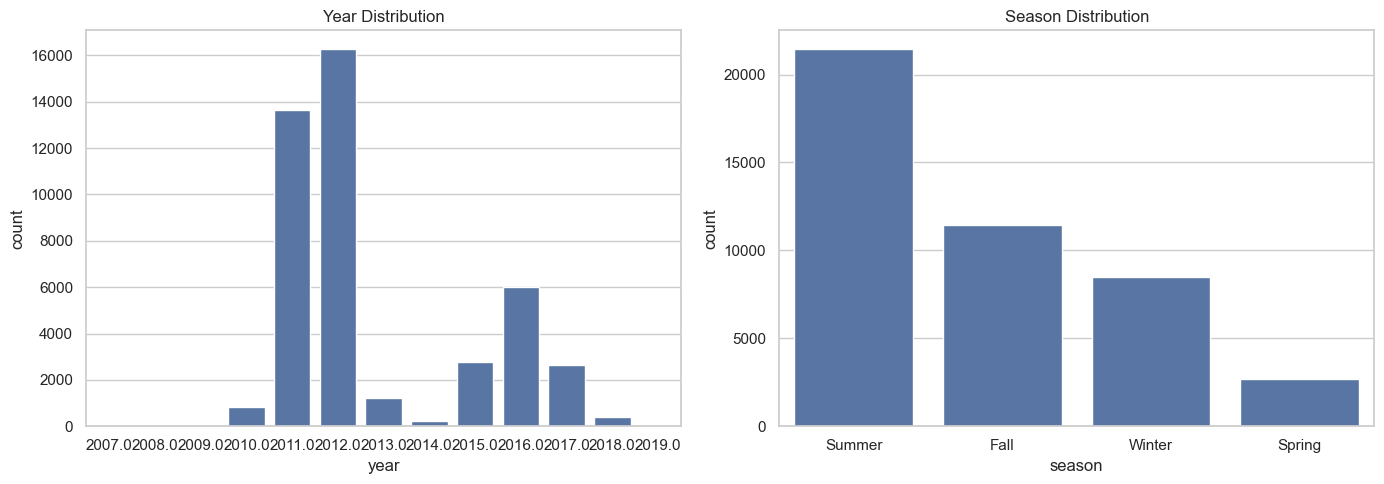

In [9]:
# Plot year and season distributions
plot_year_season_distribution(df)

## 5. Next Steps

From here, you could:
- Explore relationships between variables (e.g., gender vs. category).
- Analyze image characteristics.
- Prepare data for machine learning or recommendation systems.

This notebook provides a solid foundation for understanding and working with the fashion product image dataset.